# A Jupyter Notebook to access structures and data from the master worksheet



This notebook demonstates how to get the structures and data from the master worksheet, then convert the SMILES to molecule objects that allow some simple manipulisations and visualisations. SMILES (Simplified Molecular Input Line Entry System) is a line notation (a typographical method using printable characters) for entering and representing molecules and reactions. https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html

## Getting the data

In [1]:
#First get data from Google doc

##old notebook https://docs.google.com/spreadsheets/d/1fAxwae9W--0BLCLU1KIGdXcVGvxiLiO7VxjKoEO2XHE
##https://docs.google.com/spreadsheets/d/168-a1_l51Nfbms67eG8zU8p-EhEtEO26FUzRInbu7fY/edit#gid=1048487387



!wget -O example.tsv https://docs.google.com/spreadsheets/d/168-a1_l51Nfbms67eG8zU8p-EhEtEO26FUzRInbu7fY/export?format=tsv '--no-check-certificate'

#The data is downloaded to a file called example.tsv in the same folder as the notebook, in tab separated format

--2019-12-03 12:42:22--  https://docs.google.com/spreadsheets/d/168-a1_l51Nfbms67eG8zU8p-EhEtEO26FUzRInbu7fY/export?format=tsv
Resolving docs.google.com (docs.google.com)... 172.217.169.78
Connecting to docs.google.com (docs.google.com)|172.217.169.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/tab-separated-values]
Saving to: ‘example.tsv’

example.tsv             [ <=>                ] 216.48K  --.-KB/s    in 0.1s    

2019-12-03 12:42:23 (1.84 MB/s) - ‘example.tsv’ saved [221672]



Import the required python modules and then import the example.tsv file into a Pandas dataframe called datafile

In [2]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw



import pandas as pd
#datafile = pd.read_table('./export?format=tsv')
datafile = pd.read_csv('example.tsv', sep = '\t')

RDKit WARNING: [12:42:23] Enabling RDKit 2019.09.1 jupyter extensions


In [3]:
#Allow inline images
%matplotlib inline


In [4]:
#View first five rows
datafile.head(5)

SMILES_parent      OSA_ID Salt Target  \
0         CN1CCN(CC1)c1ccc(cc1)C#N  OSA_000001  NaN   MurD   
1  CN1CCN(CC1)C(=O)NC1=CC=C(F)C=C1  OSA_000002  NaN   MurD   
2        CC(CO)(CO)NC(=O)Nc1ccccc1  OSA_000003  NaN   MurD   
3         CC(C)C(=O)Nc1cccc(c1)C#N  OSA_000004  NaN   MurD   
4     O=S1(CCN(CC1)Cc2ccc(C)cc2)=O  OSA_000005  NaN   MurE   

                                                Name  \
0             4-(4-methylpiperazin-1-yl)benzonitrile   
1  N-(4-fluorophenyl)-4-methylpiperazine-1-carbox...   
2  3-(1,3-dihydroxy-2-methylpropan-2-yl)-1-phenyl...   
3              N-(3-cyanophenyl)-2-methylpropanamide   
4       4-(4-methylbenzyl)thiomorpholine 1,1-dioxide   

                      InChIKey VendorID/ LabNotebook ID      MW  \
0  ZSDPKKGOSKXEHN-UHFFFAOYSA-N              Z2856434840  201.27   
1  MDBPFVSVLGYVCQ-UHFFFAOYSA-N              Z2856434944  237.27   
2  NLGYHTMGWVQQIL-UHFFFAOYSA-N                Z57472297  224.26   
3  JWBISRKEEZGPFB-UHFFFAOYSA-N                Z26548083  188.23   
4  PBEMXBVPRZGFNM-UHFFFAOYSA-N              Z2856434929  239.33   

    Fragalysis_ref       Source  ...         CompTox Lipidmaps DrugCentral  \
0       MURD-x0349  FragLibrary  ...  DTXSID30354088       NaN         NaN   
1       MURD-x0373  FragLibrary  ...             NaN       NaN         NaN   
2       MURD-x0374  FragLibrary  ...             NaN       NaN         NaN   
3       MURD-x0378  FragLibrary  ...             NaN       NaN         NaN   
4  MUREECA-x0198_3  FragLibrary  ...             NaN       NaN         NaN   

  Carotenoid  Metabolights  Brenda rhea  chemicalbook swisslipids  gsrs  
0         NaN          NaN     NaN  NaN           NaN         NaN   NaN  
1         NaN          NaN     NaN  NaN           NaN         NaN   NaN  
2         NaN          NaN     NaN  NaN           NaN         NaN   NaN  
3         NaN          NaN     NaN  NaN           NaN         NaN   NaN  
4         NaN          NaN     NaN  NaN           NaN         NaN   NaN  

[5 rows x 51 columns]

In [5]:
#Find how many rows
len(datafile.index)

710

## Convert the SMILES string to an RDKit molecular object 

At the moment the molecule structures are represented by a SMILES string, we can convert the SMILES string to an RDKit molecular object and then display

In [6]:
#Remember the first row is row zero.
smiles = datafile['SMILES_parent'].loc[2]


In [7]:
#convert SMILES string to a RDKit molecular object
mol = Chem.MolFromSmiles(smiles)

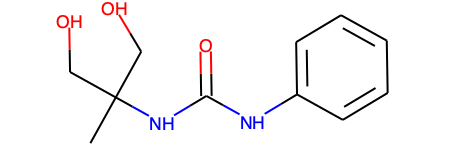

In [8]:
mol

We can see the different datatypes in the dataframe

## Adding structures to pandas dataframe

We can now convert the SMILES string to a RDKit molecular object for every row in the dataframe


In [9]:
PandasTools.AddMoleculeColumnToFrame(datafile,'SMILES_parent','Molecule',includeFingerprints=True)
>>> print([str(x) for x in  datafile.columns])

['SMILES_parent', 'OSA_ID', 'Salt', 'Target', 'Name', 'InChIKey', 'VendorID/ LabNotebook ID', 'MW', 'Fragalysis_ref', 'Source', 'Status', 'Wiki link', 'MountingResult', 'DataCollectionOutcome', 'LigandBound', 'PubchemCID', 'ChEMBL', 'Drugbank', 'PDBligand', 'Guide to Pharm', 'Drugs of the Future', 'Kegg Ligand', 'ChEBI', 'NIH Clinical', 'ZINC', 'eMolecules', 'IBM IP', 'Gene Expression', 'NFDA Substance', 'SureChEMBL Patents', 'PharmGKB', 'Human Metab', 'Selleck', 'Thomson Pharma', 'Mcule', 'NMR shift DB', 'Networks', 'Toxicology Resource', 'MolPort', 'Japanese Chemicals', 'BindingDB', 'CompTox', 'Lipidmaps', 'DrugCentral', 'Carotenoid ', 'Metabolights', 'Brenda', 'rhea', 'chemicalbook', 'swisslipids', 'gsrs', 'Molecule']


In [10]:
#Find how many rows
len(datafile.index)

710

If we view the dataframe the molecule object has been added to the last column. It would be better if the structure was more readily visible. So we change the column order.

SMILES_parent      OSA_ID Salt Target  \
0         CN1CCN(CC1)c1ccc(cc1)C#N  OSA_000001  NaN   MurD   
1  CN1CCN(CC1)C(=O)NC1=CC=C(F)C=C1  OSA_000002  NaN   MurD   
2        CC(CO)(CO)NC(=O)Nc1ccccc1  OSA_000003  NaN   MurD   

                                                Name  \
0             4-(4-methylpiperazin-1-yl)benzonitrile   
1  N-(4-fluorophenyl)-4-methylpiperazine-1-carbox...   
2  3-(1,3-dihydroxy-2-methylpropan-2-yl)-1-phenyl...   

                      InChIKey VendorID/ LabNotebook ID      MW  \
0  ZSDPKKGOSKXEHN-UHFFFAOYSA-N              Z2856434840  201.27   
1  MDBPFVSVLGYVCQ-UHFFFAOYSA-N              Z2856434944  237.27   
2  NLGYHTMGWVQQIL-UHFFFAOYSA-N                Z57472297  224.26   

  Fragalysis_ref       Source  ... Lipidmaps DrugCentral Carotenoid   \
0     MURD-x0349  FragLibrary  ...       NaN         NaN         NaN   
1     MURD-x0373  FragLibrary  ...       NaN         NaN         NaN   
2     MURD-x0374  FragLibrary  ...       NaN         NaN         NaN   

  Metabolights Brenda  rhea chemicalbook  swisslipids gsrs  \
0          NaN    NaN   NaN          NaN          NaN  NaN   
1          NaN    NaN   NaN          NaN          NaN  NaN   
2          NaN    NaN   NaN          NaN          NaN  NaN   

                                            Molecule  
0  <img data-content="rdkit/molecule" src="data:i...  
1  <img data-content="rdkit/molecule" src="data:i...  
2  <img data-content="rdkit/molecule" src="data:i...  

[3 rows x 52 columns]
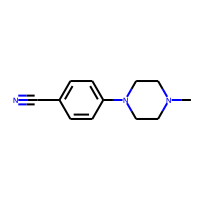
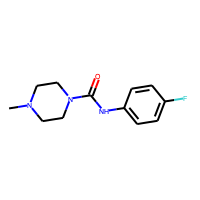
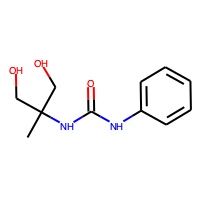

In [11]:
datafile.head(3)

In [12]:
#display the current order
cols = list(datafile.columns.values)
cols

['SMILES_parent',
 'OSA_ID',
 'Salt',
 'Target',
 'Name',
 'InChIKey',
 'VendorID/ LabNotebook ID',
 'MW',
 'Fragalysis_ref',
 'Source',
 'Status',
 'Wiki link',
 'MountingResult',
 'DataCollectionOutcome',
 'LigandBound',
 'PubchemCID',
 'ChEMBL',
 'Drugbank',
 'PDBligand',
 'Guide to Pharm',
 'Drugs of the Future',
 'Kegg Ligand',
 'ChEBI',
 'NIH Clinical',
 'ZINC',
 'eMolecules',
 'IBM IP',
 'Gene Expression',
 'NFDA Substance',
 'SureChEMBL Patents',
 'PharmGKB',
 'Human Metab',
 'Selleck',
 'Thomson Pharma',
 'Mcule',
 'NMR shift DB',
 'Networks',
 'Toxicology Resource',
 'MolPort',
 'Japanese Chemicals',
 'BindingDB',
 'CompTox',
 'Lipidmaps',
 'DrugCentral',
 'Carotenoid ',
 'Metabolights',
 'Brenda',
 'rhea',
 'chemicalbook',
 'swisslipids',
 'gsrs',
 'Molecule']

In [13]:
#change the column order
datafile = datafile [['OSA_ID', 'Molecule','SMILES_parent',
 'Salt',
 'Target',
 'Name',
 'InChIKey',
 'VendorID/ LabNotebook ID',
 'MW',
 'Fragalysis_ref',
 'Source',
 'Status',
 'Wiki link',
 'MountingResult',
 'DataCollectionOutcome',
 'LigandBound',
 'PubchemCID',
 'ChEMBL',
 'Drugbank',
 'PDBligand',
 'Guide to Pharm',
 'Drugs of the Future',
 'Kegg Ligand',
 'ChEBI',
 'NIH Clinical',
 'ZINC',
 'eMolecules',
 'IBM IP',
 'Gene Expression',
 'NFDA Substance',
 'SureChEMBL Patents',
 'PharmGKB',
 'Human Metab',
 'Selleck',
 'Thomson Pharma',
 'Mcule',
 'NMR shift DB',
 'Networks',
 'Toxicology Resource',
 'MolPort',
 'Japanese Chemicals',
 'BindingDB',
 'CompTox',
 'Lipidmaps',
 'DrugCentral',
 'Carotenoid ',
 'Metabolights',
 'Brenda',
 'rhea',
 'chemicalbook',
 'swisslipids',
 'gsrs']]

OSA_ID                                           Molecule  \
0  OSA_000001  <img data-content="rdkit/molecule" src="data:i...   
1  OSA_000002  <img data-content="rdkit/molecule" src="data:i...   
2  OSA_000003  <img data-content="rdkit/molecule" src="data:i...   

                     SMILES_parent Salt Target  \
0         CN1CCN(CC1)c1ccc(cc1)C#N  NaN   MurD   
1  CN1CCN(CC1)C(=O)NC1=CC=C(F)C=C1  NaN   MurD   
2        CC(CO)(CO)NC(=O)Nc1ccccc1  NaN   MurD   

                                                Name  \
0             4-(4-methylpiperazin-1-yl)benzonitrile   
1  N-(4-fluorophenyl)-4-methylpiperazine-1-carbox...   
2  3-(1,3-dihydroxy-2-methylpropan-2-yl)-1-phenyl...   

                      InChIKey VendorID/ LabNotebook ID      MW  \
0  ZSDPKKGOSKXEHN-UHFFFAOYSA-N              Z2856434840  201.27   
1  MDBPFVSVLGYVCQ-UHFFFAOYSA-N              Z2856434944  237.27   
2  NLGYHTMGWVQQIL-UHFFFAOYSA-N                Z57472297  224.26   

  Fragalysis_ref  ...         CompTox Lipidmaps DrugCentral Carotenoid   \
0     MURD-x0349  ...  DTXSID30354088       NaN         NaN         NaN   
1     MURD-x0373  ...             NaN       NaN         NaN         NaN   
2     MURD-x0374  ...             NaN       NaN         NaN         NaN   

  Metabolights Brenda  rhea chemicalbook  swisslipids gsrs  
0          NaN    NaN   NaN          NaN          NaN  NaN  
1          NaN    NaN   NaN          NaN          NaN  NaN  
2          NaN    NaN   NaN          NaN          NaN  NaN  

[3 rows x 52 columns]
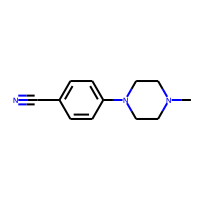
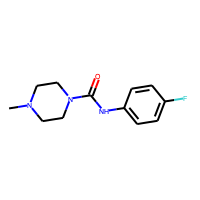
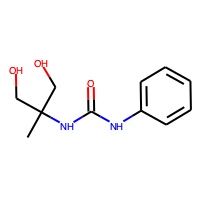

In [14]:
datafile.head(3)

If we want to view all structures we can diaplay them as a grid

/Users/chrisswain/miniconda3/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


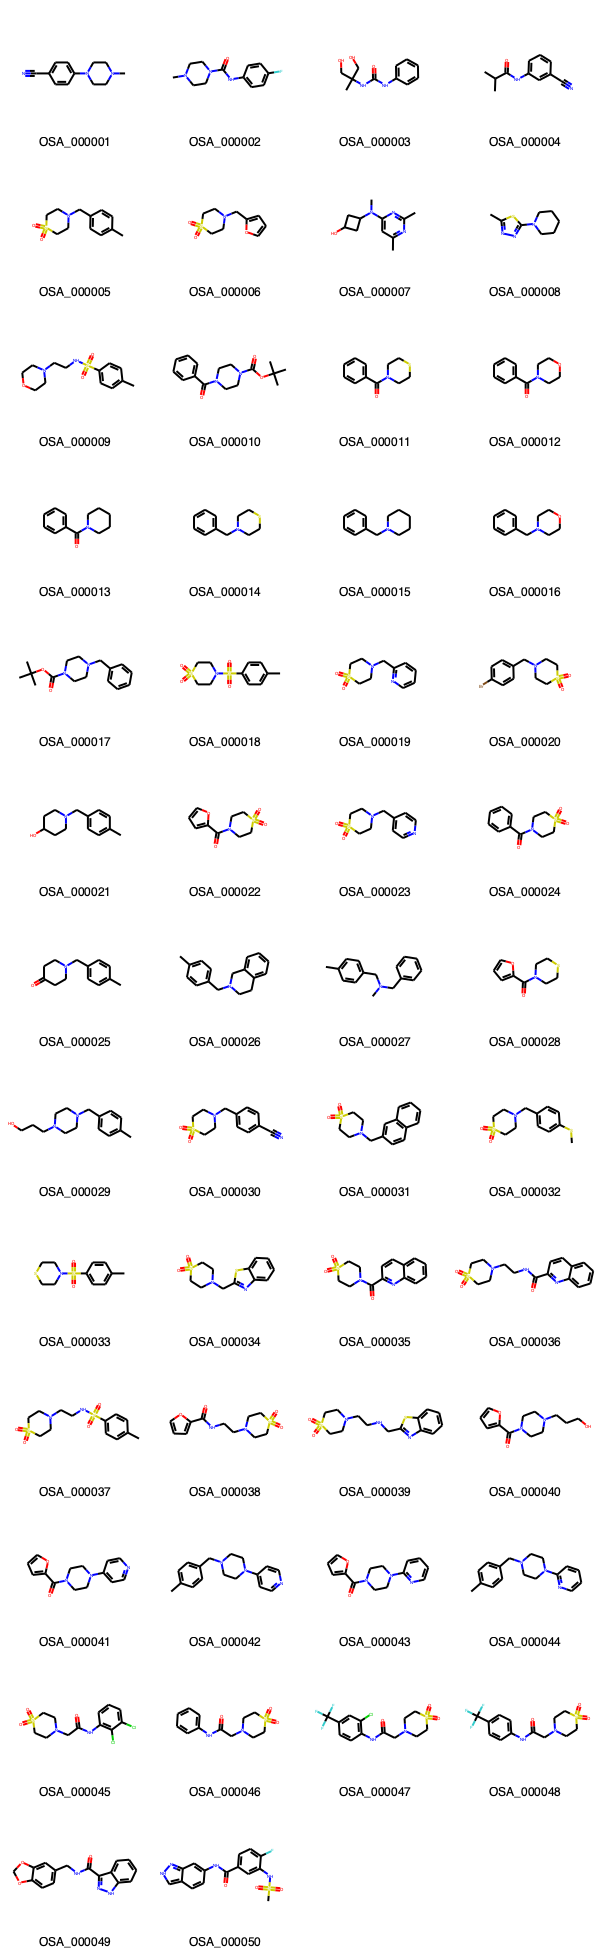

In [15]:
PandasTools.FrameToGridImage(datafile, column= 'Molecule', molsPerRow=4,subImgSize=(150,150),legendsCol="OSA_ID")

## Calculation of molecule properties

Now calculate a variety of properties using RDKit, adding them to the end of the dataframe. you can choose which properties to add here.

In [16]:
# Some of the availble descriptors are described here http://rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
from rdkit.Chem import rdMolDescriptors

In [17]:
#create dataframe with just OSA_ID and structures

newdataframe = datafile[['OSA_ID', 'Molecule', 'SMILES_parent']].copy()
newdataframe.shape

(710, 3)

In [18]:
#for checking SMILES strings
#for x in range(0, 710):
#    mol = newdataframe.loc[x, 'Molecule']
#    print(x)
#    hbd = rdMolDescriptors.CalcNumHBD(mol)
#    hbd

In [19]:
hbdlist = [] #hydrogen bond donors
hbalist = [] #hydrogen bond acceptors
tpsalist = [] #Total polar surface area
mwtlist = [] #Exact molecular weight
logPlist = [] #Crippen LogP
mrlist = [] #Crippen MR
for mol in newdataframe['Molecule']:
    hbd = rdMolDescriptors.CalcNumHBD(mol)
    hbdlist.append(hbd)
    hba = rdMolDescriptors.CalcNumHBA(mol)
    hbalist.append(hba)
    TPSA = rdMolDescriptors.CalcTPSA(mol)
    tpsalist.append(TPSA)
    mwt = rdMolDescriptors.CalcExactMolWt(mol)
    mwtlist.append(mwt)
    crippen = rdMolDescriptors.CalcCrippenDescriptors(mol) #returns a 2-tuple with the Wildman-Crippen logp,mr values
    logPlist.append(crippen[0])#first is logP
    mrlist.append(crippen[1])#second is mr

We now add each of the properties to the dataframe

OSA_ID                                           Molecule  \
0  OSA_000001  <img data-content="rdkit/molecule" src="data:i...   
1  OSA_000002  <img data-content="rdkit/molecule" src="data:i...   
2  OSA_000003  <img data-content="rdkit/molecule" src="data:i...   

                     SMILES_parent  HBD  HBA   TPSA         MWt     LogP  \
0         CN1CCN(CC1)c1ccc(cc1)C#N    0    3  30.27  201.126597  1.31008   
1  CN1CCN(CC1)C(=O)NC1=CC=C(F)C=C1    1    2  35.58  237.127740  1.60500   
2        CC(CO)(CO)NC(=O)Nc1ccccc1    4    3  81.59  224.116092  0.55140   

        MR  
0  60.8670  
1  64.4887  
2  61.1730
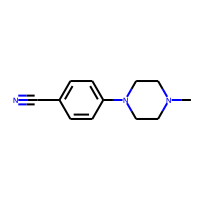
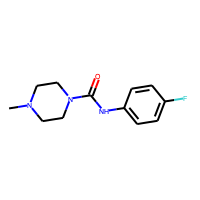
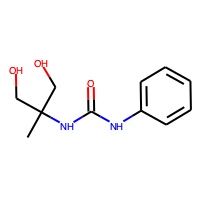

In [20]:
newdataframe['HBD']=hbdlist
newdataframe['HBA']=hbalist
newdataframe['TPSA']=tpsalist
newdataframe['MWt']=mwtlist
newdataframe['LogP']=logPlist
newdataframe['MR']=mrlist
newdataframe.head(3)

We can also add a molecular properties

In [21]:
newdataframe['NumHeavyAtoms']=datafile.apply(lambda x: x['Molecule'].GetNumHeavyAtoms(), axis=1)

OSA_ID                                           Molecule  \
0  OSA_000001  <img data-content="rdkit/molecule" src="data:i...   
1  OSA_000002  <img data-content="rdkit/molecule" src="data:i...   
2  OSA_000003  <img data-content="rdkit/molecule" src="data:i...   

                     SMILES_parent  HBD  HBA   TPSA         MWt     LogP  \
0         CN1CCN(CC1)c1ccc(cc1)C#N    0    3  30.27  201.126597  1.31008   
1  CN1CCN(CC1)C(=O)NC1=CC=C(F)C=C1    1    2  35.58  237.127740  1.60500   
2        CC(CO)(CO)NC(=O)Nc1ccccc1    4    3  81.59  224.116092  0.55140   

        MR  NumHeavyAtoms  
0  60.8670             15  
1  64.4887             17  
2  61.1730             16
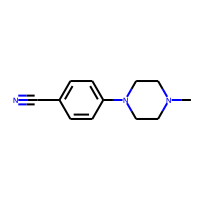
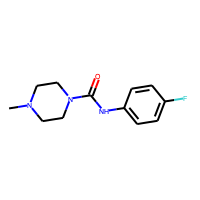
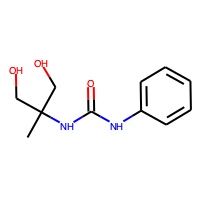

In [22]:
newdataframe.head(3)

## Plotting properties

We can using seaborn (http://seaborn.pydata.org/index.html) a Python visualization library based on matplotlib to generate a variety of plots.

In [23]:
import seaborn as sns

In [24]:
myTPSA = newdataframe['TPSA']
myMWt = newdataframe['MWt']

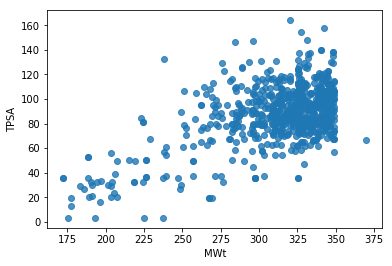

In [25]:
#Scatter plot
sns.regplot(myMWt, myTPSA, fit_reg=False)

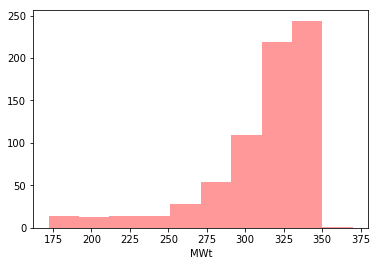

In [26]:
#bar chart
sns.distplot(myMWt, kde=False, color='red', bins =10)